In [1]:
import pandas as pd
import numpy as np 
from statsbombpy import sb

In [2]:
sub_df = pd.read_csv(r'data/freekick_pass_shot.csv', encoding = 'latin1')

C:\Users\Thomas\AppData\Local\Temp\ipykernel_13872\1827319829.py:1: DtypeWarning: Columns (39,45,46,50,53,59,77,98,99,102,103,106,108,114,117) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'data/freekick_pass_shot.csv', encoding = 'latin1')


In [3]:
sub_df[['x', 'y']] = sub_df['location'].str.extract(r'\[(.*), (.*)\]').astype(float)

In [4]:
sub_df.columns[40:80]

Index(['pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_deflected',
       'pass_end_location', 'pass_goal_assist', 'pass_height',
       'pass_inswinging', 'pass_length', 'pass_outcome', 'pass_outswinging',
       'pass_recipient', 'pass_recipient_id', 'pass_shot_assist',
       'pass_switch', 'pass_technique', 'pass_through_ball', 'pass_type',
       'period', 'play_pattern', 'player', 'player_id', 'position',
       'possession', 'possession_team', 'possession_team_id', 'related_events',
       'second', 'shot_aerial_won', 'shot_body_part', 'shot_end_location',
       'shot_first_time', 'shot_freeze_frame', 'shot_key_pass_id',
       'shot_one_on_one', 'shot_outcome', 'shot_statsbomb_xg'],
      dtype='object')

In [5]:
sub_df['pass_shot_assist'].value_counts()

pass_shot_assist
True    2700
Name: count, dtype: int64

2700


KeyError: 'y_symetric'

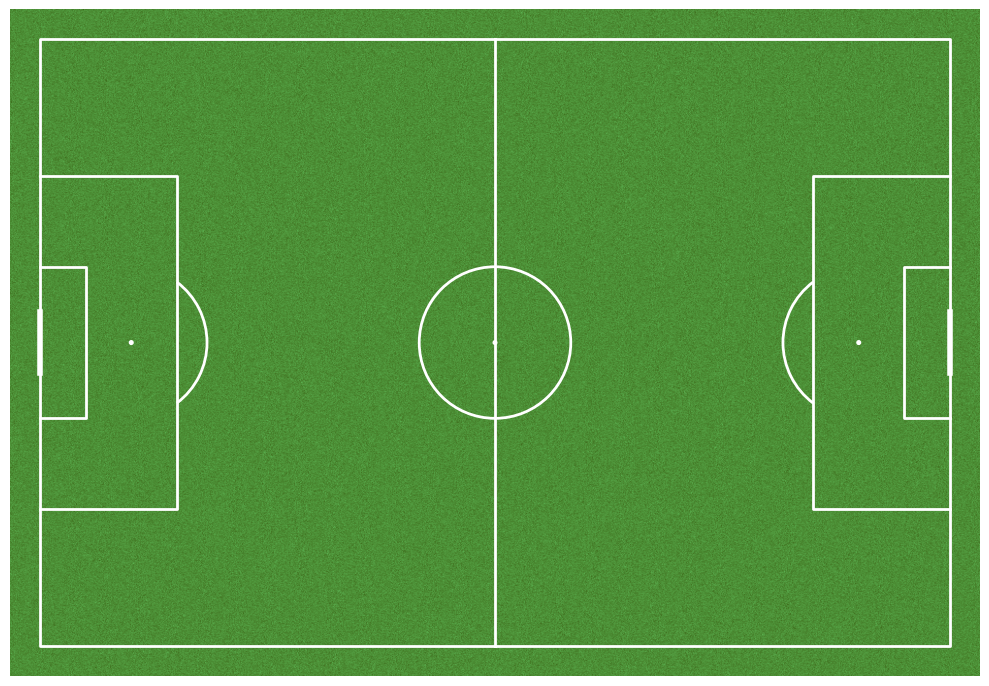

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch

pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
sub_df = sub_df[(sub_df['pass_type'] == 'Free Kick') & (sub_df['pass_shot_assist']==True)]
print(len(sub_df))
# Set up the plot
fig, ax = pitch.draw(figsize=(10, 7))

# Plot the heatmap
sns.kdeplot(
    x=sub_df['x'], 
    y=sub_df['y_symetric'], 
    shade=True, 
    cmap='coolwarm', 
    n_levels=30, 
    alpha=0.6, 
    ax=ax
)

plt.title('Heatmap of Free Kicks (symetrized) Taken giving a shot')
plt.show()

9931


C:\Users\Thomas\AppData\Local\Temp\ipykernel_13872\1786696456.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


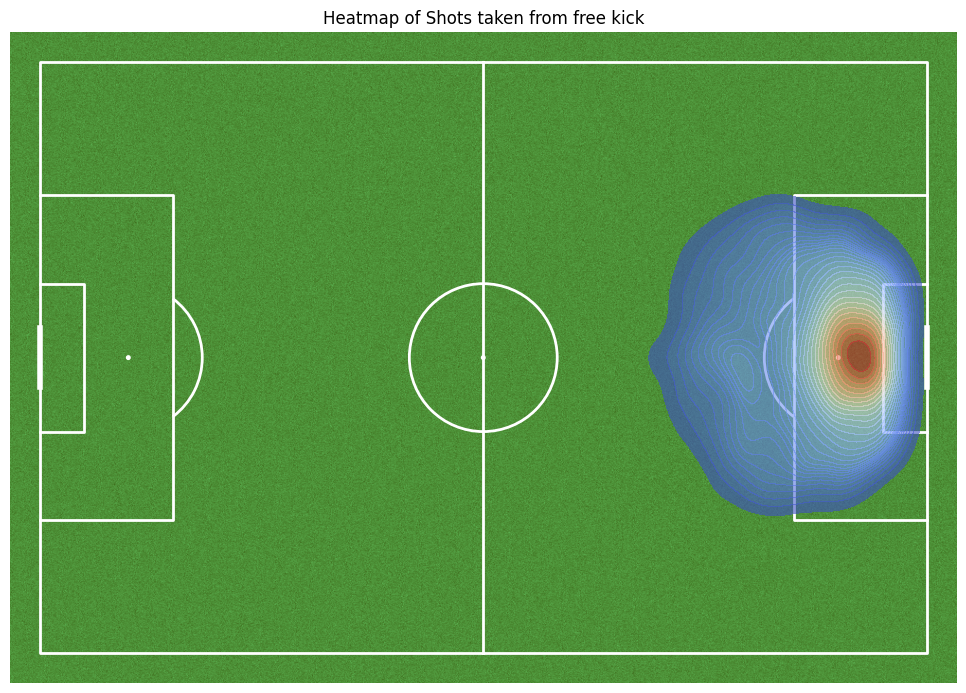

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch

pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
sub_df = sub_df[(sub_df['type'] == 'Shot')]
print(len(sub_df))

# Set up the plot
fig, ax = pitch.draw(figsize=(10, 7))

# Plot the heatmap
sns.kdeplot(
    x=sub_df['x'], 
    y=sub_df['y'], 
    shade=True, 
    cmap='coolwarm', 
    n_levels=30, 
    alpha=0.6, 
    ax=ax
)

plt.title('Heatmap of Shots taken from free kick')
plt.show()

1011


C:\Users\Thomas\AppData\Local\Temp\ipykernel_13872\1905901487.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


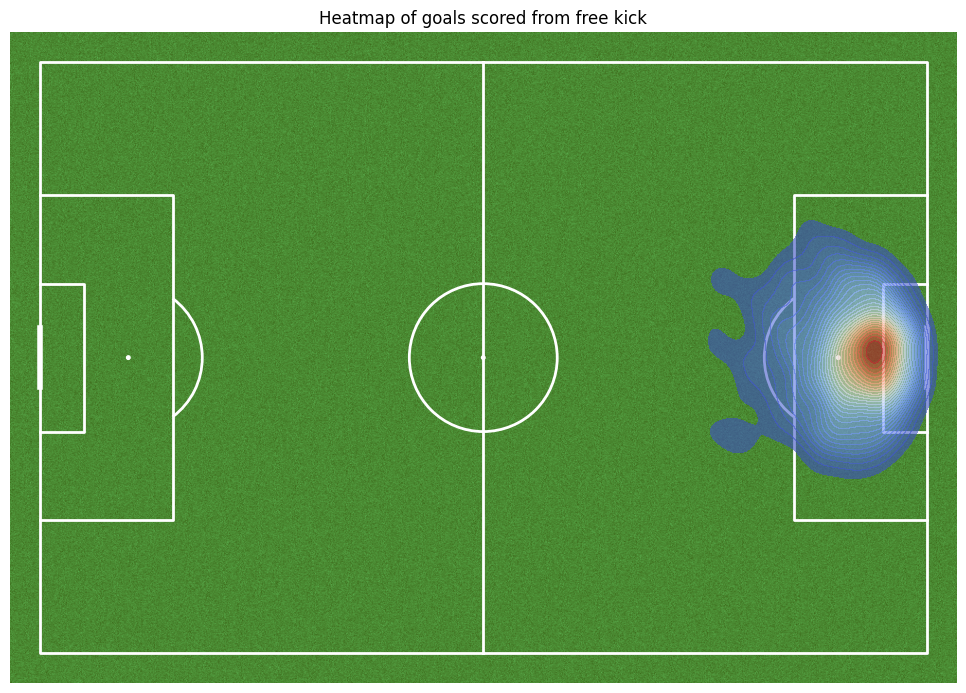

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch

pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
sub_df = sub_df[(sub_df['type'] == 'Shot') & (sub_df['shot_outcome'] == 'Goal')]
print(len(sub_df))
# Set up the plot
fig, ax = pitch.draw(figsize=(10, 7))

# Plot the heatmap
sns.kdeplot(
    x=sub_df['x'], 
    y=sub_df['y'], 
    shade=True, 
    cmap='coolwarm', 
    n_levels=30, 
    alpha=0.6, 
    ax=ax
)

plt.title('Heatmap of goals scored from free kick')
plt.show()

In [9]:
from tqdm import tqdm

In [10]:
def sanitize_rel_events(event):
    
    if pd.isna(event):
        return []
    
    if len(event) > 40:
        clean_event = event[1:-1].replace("'", "").replace(" ", "").split(',')
    else : 
        clean_event = [event[1:-1]]
    
    return clean_event

sub_df['related_events'].astype(str).replace('nan', '')
sub_df['related_events_clean'] = sub_df['related_events'].apply(sanitize_rel_events)

In [11]:
shots_from_fk = []
for i in tqdm(range(len(sub_df))):
    if (sub_df['pass_type'][i] == 'Free Kick'):
        rel_shot = sub_df['pass_assisted_shot_id'][i] 
        if pd.notna(rel_shot):
            shots_from_fk.append(rel_shot)

print("Number of Shots taken from a Pass Free Kick :", len(shots_from_fk))

100%|██████████| 106908/106908 [00:00<00:00, 124811.88it/s]

Number of Shots taken from a Pass Free Kick : 2986


C:\Users\Thomas\AppData\Local\Temp\ipykernel_13872\393560232.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(


2986


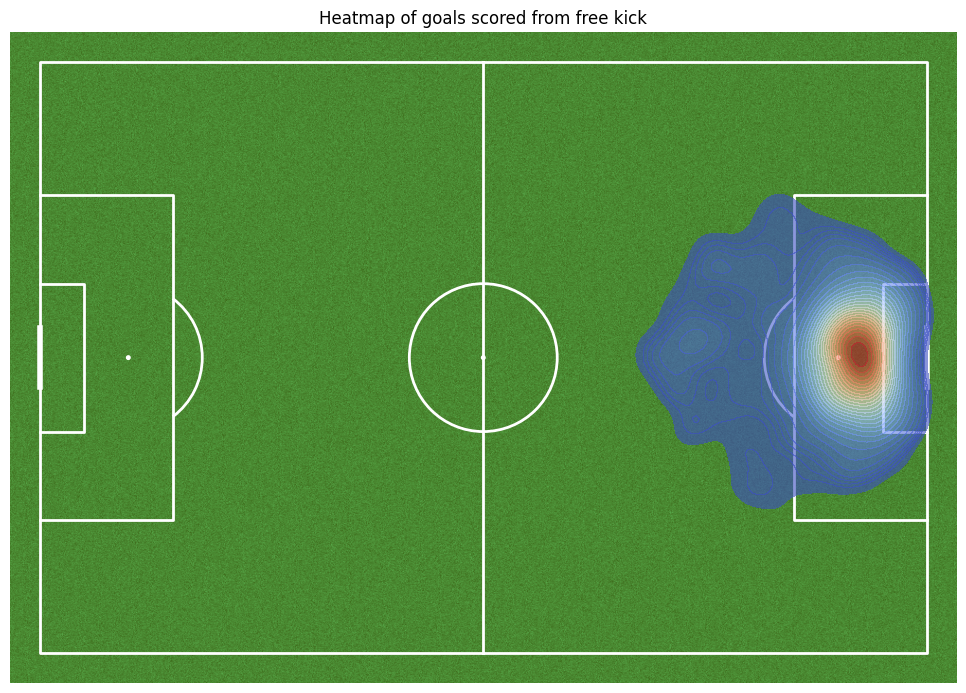

In [12]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
sub_df = sub_df[sub_df['id'].isin(shots_from_fk)]
print(len(sub_df))

fig, ax = pitch.draw(figsize=(10, 7))

kde = sns.kdeplot(
    x=sub_df['x'], 
    y=sub_df['y'], 
    shade=True, 
    cmap='coolwarm', 
    n_levels=30, 
    alpha=0.6, 
    ax=ax
)

plt.title('Heatmap of goals scored from free kick')
plt.show()

<Axes: xlabel='shot_statsbomb_xg', ylabel='Count'>

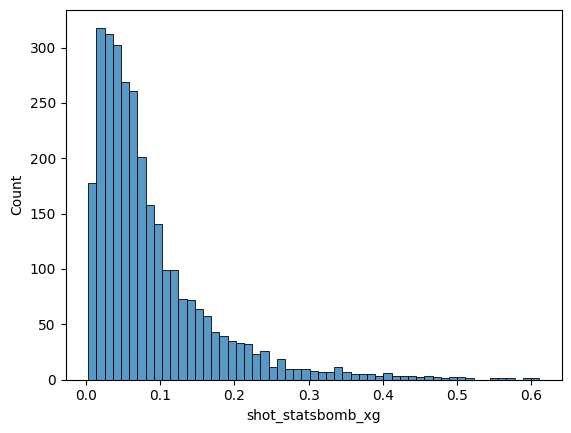

In [13]:
sub_df = sub_df[sub_df['id'].isin(shots_from_fk)]
sns.histplot(sub_df['shot_statsbomb_xg'])

2986


C:\Users\Thomas\AppData\Local\Temp\ipykernel_13872\593347384.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(


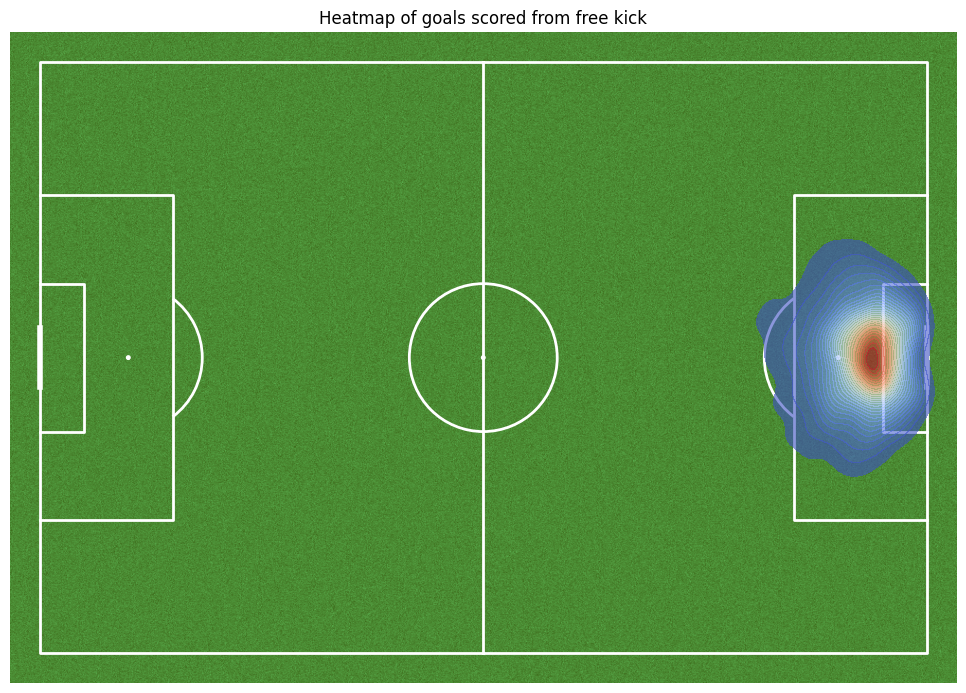

In [14]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
sub_df = sub_df[sub_df['id'].isin(shots_from_fk)].reset_index(drop = True)
print(len(sub_df))

fig, ax = pitch.draw(figsize=(10, 7))

kde = sns.kdeplot(
    x=sub_df['x'], 
    y=sub_df['y'], 
    shade=True, 
    weights=sub_df['shot_statsbomb_xg'],
    cmap='coolwarm', 
    n_levels=30, 
    alpha=0.6, 
    ax=ax
)

plt.title('Heatmap of goals scored from free kick')
plt.show()

In [15]:
import plotly.graph_objects as go
from plotly_football_pitch import (
    make_pitch_figure,
    PitchDimensions,
    SingleColourBackground
)


dimensions = PitchDimensions(pitch_width_metres=80, pitch_length_metres=120)

fig = make_pitch_figure(
    dimensions,
    pitch_background=SingleColourBackground("#3ab54a"),

)

shots = go.Scatter(
        x=sub_df['x'],
        y=sub_df['y'],
        mode="markers",
        marker={"size": 2 + 30*sub_df['shot_statsbomb_xg'], "color": "red"},
        hovertext=sub_df['shot_statsbomb_xg'],
        showlegend=False,
    )

fig.add_trace(shots)

fig.update_layout(height = 850, width = 1200, title="Scatter plot of shots with size corresponding to xG")
fig.show()

In [16]:
from scipy.spatial import distance
import ast
import math

sub_df['float_location'] = [ast.literal_eval(sub_df['location'][i]) for i in range(len(sub_df))]

goal_loc = [120, 40]
sub_df['distance_to_goal'] = [distance.euclidean(sub_df['float_location'][i], goal_loc) for i in range(len(sub_df))]

def calculate_angle(point1, point2):
    delta_y = point2[1] - point1[1]
    delta_x = point2[0] - point1[0]
    angle = math.atan2(delta_y, delta_x)
    angle_degrees = math.degrees(angle)

    if angle_degrees < 0:
        angle_degrees += 360
        
    if angle_degrees > 180:
        angle_degrees = 360 - angle_degrees
        
    return angle_degrees

sub_df['angle_shot'] = [calculate_angle(sub_df['float_location'][i], goal_loc) for i in range(len(sub_df))]

In [17]:
sub_df['shot_outcome'].value_counts()

shot_outcome
Off T               1219
Saved                673
Blocked              484
Goal                 286
Wayward              226
Post                  67
Saved Off Target      20
Saved to Post         11
Name: count, dtype: int64

In [18]:
import plotly.express as px

fig = px.scatter(sub_df, 
                 x="distance_to_goal", 
                 y="shot_statsbomb_xg", 
                 color="shot_outcome",
                )

fig.update_layout(title = "Expected Goals in function of Distance to goal")
fig.show()

In [32]:
len(sub_df)*0.05

149.3

In [30]:
import pandas as pd
import numpy as np
import plotly.express as px

# Assuming you have a DataFrame `df` with the columns `distance_to_goal` and `shot_statsbomb_xg`
# df = pd.read_csv('your_data.csv')

# Bin the distance_to_goal
bins = np.linspace(sub_df['distance_to_goal'].min(), sub_df['distance_to_goal'].max(), 50)
sub_df['binned_distance'] = pd.cut(sub_df['distance_to_goal'], bins)

# Compute the 95th percentile for each bin
percentiles = sub_df.groupby('binned_distance')['shot_statsbomb_xg'].quantile(0.95).reset_index()
percentiles['distance_to_goal'] = percentiles['binned_distance'].apply(lambda x: x.mid)

# Create scatter plot
fig = px.scatter(sub_df, x='distance_to_goal', y='shot_statsbomb_xg', color='shot_outcome',
                 title='Expected Goals in function of Distance to goal')

# Add the 95th percentile line
fig.add_scatter(x=percentiles['distance_to_goal'], y=percentiles['shot_statsbomb_xg'], mode='lines', name='95th Percentile',line=dict(color='black', width=5))

fig.show()


C:\Users\Thomas\AppData\Local\Temp\ipykernel_13872\1393339314.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [19]:
fig = px.scatter(sub_df, 
                 x="angle_shot", 
                 y="shot_statsbomb_xg", 
                 color="shot_outcome",
                )

fig.update_layout(title = "Expected Goals in function of Distance to goal")
fig.show()

In [61]:
players

[{'location': [101.8, 43.2],
  'player': {'id': 15577, 'name': 'Angharad James'},
  'position': {'id': 11, 'name': 'Left Defensive Midfield'},
  'teammate': False},
 {'location': [112.7, 28.4],
  'player': {'id': 46636, 'name': 'Bethan Roberts'},
  'position': {'id': 2, 'name': 'Right Back'},
  'teammate': False},
 {'location': [112.2, 32.9],
  'player': {'id': 10102, 'name': 'Stine Larsen'},
  'position': {'id': 23, 'name': 'Center Forward'},
  'teammate': True},
 {'location': [113.6, 36.2],
  'player': {'id': 20061, 'name': 'Deanna Cooper'},
  'position': {'id': 3, 'name': 'Right Center Back'},
  'teammate': False},
 {'location': [99.5, 59.0],
  'player': {'id': 46535, 'name': 'Natalie Haigh'},
  'position': {'id': 13, 'name': 'Right Center Midfield'},
  'teammate': True},
 {'location': [110.4, 39.1],
  'player': {'id': 46536, 'name': 'Caroline Siems'},
  'position': {'id': 6, 'name': 'Left Back'},
  'teammate': True},
 {'location': [112.7, 36.8],
  'player': {'id': 46542, 'name': 'S

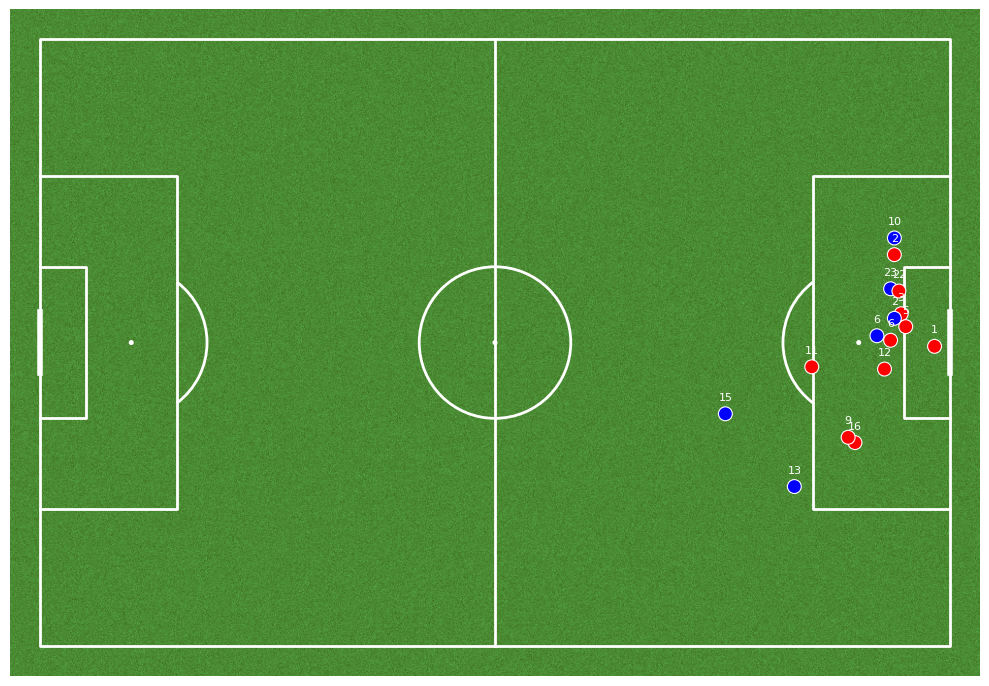

In [60]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import plotly.graph_objects as go

# Create the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch.draw(figsize=(10, 7))

# Data for plotting
players = ast.literal_eval(sub_df[sub_df['shot_statsbomb_xg'] == 0.5080946]['shot_freeze_frame'].values[0])

# Extract locations and player names
x = [player['location'][0] for player in players]
y = [player['location'][1] for player in players]
names = [player['position']['id'] for player in players]
teammates = [player['teammate'] for player in players]

palette = {True: 'blue', False: 'red'}
sns.scatterplot(x=x, y=y, ax=ax, s=100, hue=teammates, palette=palette, legend=False)

# Annotate the points with player names
for i, name in enumerate(names):
    ax.annotate(name, (x[i], y[i]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='white')

plt.show()